In [4]:
import hamiltonian
import configuration
import Projet_Code
from importlib import reload



In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import collections  as mc 
from matplotlib.animation import FuncAnimation
import Projet_Code
import configuration
import functools

In [7]:
reload(Projet_Code)
L=6
Beta=20
m=3
Jx=1
Jz=2
chessboard=Projet_Code.Chessboard(L, Beta, m, Jx, Jz)
conf=configuration.Configuration(chessboard)

In [8]:
length_cycle=100    # number of update trials (arbitrary for the moment)
N=200   # time steps

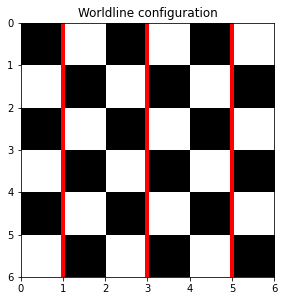

(-1.0, 1.0)

In [26]:
# plot worldline configuration and energy (two-panel figure)
fig=plt.figure(figsize=(10, 5))
# worldline configuration
ax1=fig.add_subplot(1, 2, 1)
ax1.set_title("Worldline configuration")


im=ax1.imshow(chessboard.binary_chessboard, cmap='binary_r', interpolation='nearest', extent=chessboard.extent, alpha=1, aspect=1)
color_red=(1, 0, 0, 1)
lines=chessboard.worldlines_board
print(lines)
#lines = [[(0,1),(0,2)],[]]
lc=mc.LineCollection(lines, colors=color_red, linewidths=4)
ax1.add_collection(lc)
plt.show()
lc.remove()
plt.show()

# energy per spin
ax2=fig.add_subplot(1, 2, 2)
ax2.set_title("Energy per spin")
curve, =ax2.plot([], [])
ax2.set_xlim(0, N)
ax2.set_ylim(-1, 1)



In [31]:
lc.remove(lines[0])
plt.show()

TypeError: remove() takes 1 positional argument but 2 were given

In [19]:
def worldline_anim(n):
        '''Animation function for update algorithm'''
        # update trial
        for i in range(length_cycle):
            chess.local_update()
        e=np.average(np.array([conf._get_energy(i) for i in range(2*conf.m)]))/conf.size
        # plot update (left)
        lc.remove()
        lines=chess._get_worldlines_board()
        lc=mc.LineCollection(lines, colors=color_red, linewidths=4)
        ax1.add_collection(lc)
        # plot update (right)
        if len(time)<N: time.append(n)
        if len(energ)<N: energ.append(e)
        else:
            energ.insert(N, e)
            energ.pop(0)
        curve.set_data(time, energ)
        return (lines, curve)

In [20]:
time=[]
energ=[]
animation=FuncAnimation(fig, worldline_anim, interval=1, blit=False)
plt.show()
